In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import csv
import numpy as np


# Read in fertility data; save in dictionary

birth_counts = {}

start_reading = False

with open('Data/birthsummary2022workbook.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in reader:
        if start_reading:
            birth_counts[int(row[0])] = []
            for i in row[2:8]:
                birth_counts[int(row[0])].append(int(i.replace(',', '')))
        if row[0] == "2021":
            start_reading = True
        if row[0] == "1980":
            start_reading = False


In [2]:
# Estimate UK parental age for comix and polymod survey times from ONS fertility data between 1985-2020

comix_read = 2020
polymod_read = 2005

parental_age_diff = 3
portion_dads = 1.0

comix_parents = []
for i in range(4):
    comix_parents.append([])
polymod_parents = []
for i in range(4):
    polymod_parents.append([])

age_groups = [[15,20],[20,25],[25,30],[30,35],[35,40],[40,45]]

# comix
for i in range(1980,2021):
    age = comix_read - i
    if 5 > age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[0] = comix_parents[0] + num_parents * [age + k]
                
    if 10 > age and 5 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[1] = comix_parents[1] + num_parents * [age + k] 
                
    if 15 > age and 10 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[2] = comix_parents[2] + num_parents * [age + k] 
                
    if 20 > age and 15 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                comix_parents[3] = comix_parents[3] + num_parents * [age + k]
                
# polymod
for i in range(1980,polymod_read+1):
    age = polymod_read - i
    if 5 > age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[0] = polymod_parents[0] + num_parents * [age + k] 
                
    if 10 > age and 5 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[1] = polymod_parents[1] + num_parents * [age + k]
                
    if 15 > age and 10 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[2] = polymod_parents[2] + num_parents * [age + k]
                
    if 20 > age and 15 <= age:
        for j in range(len(birth_counts[i])):
            num_parents = int(birth_counts[i][j] / 5)
            
            for k in range(age_groups[j][0],age_groups[j][1]):
                polymod_parents[3] = polymod_parents[3] + num_parents * [age + k]
               

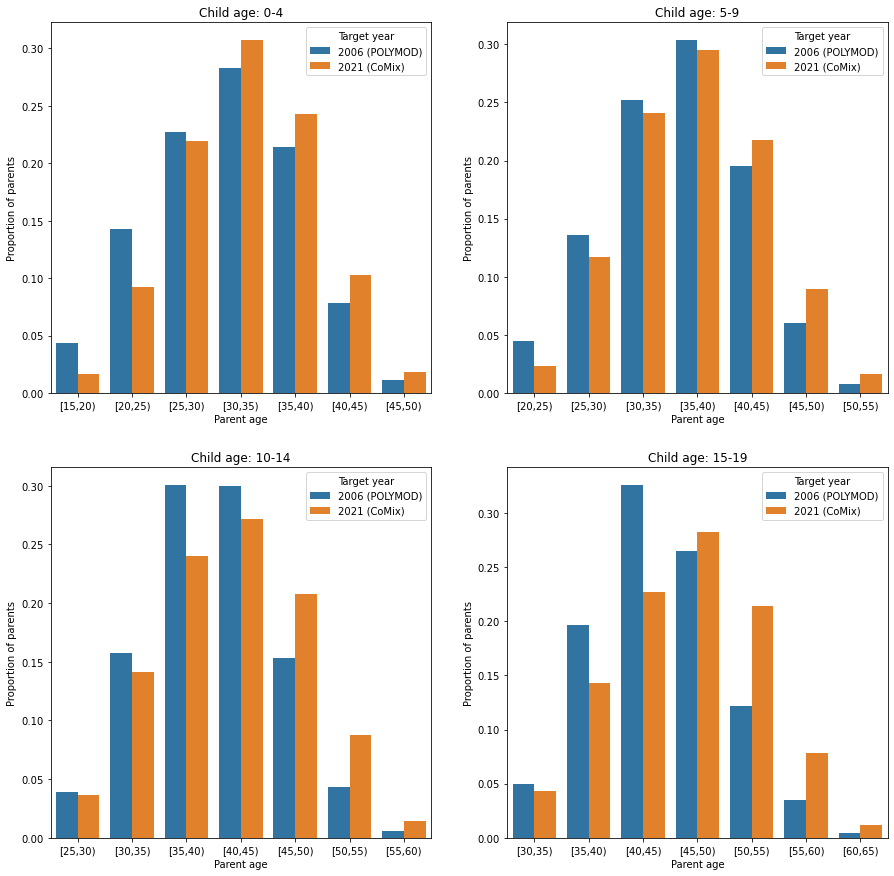

In [3]:
# Manual binning of estimated parental ages

polymod_parents_binned = {
    '0-4': list(np.unique(np.digitize(polymod_parents[0],bins=range(15,47,5)),return_counts=True)[1]),
    '5-9': list(np.unique(np.digitize(polymod_parents[1],bins=range(20,52,5)),return_counts=True)[1]),
    '10-14': list(np.unique(np.digitize(polymod_parents[2],bins=range(25,57,5)),return_counts=True)[1]),
    '15-19': list(np.unique(np.digitize(polymod_parents[3],bins=range(30,62,5)),return_counts=True)[1])
}

comix_parents_binned = {
    '0-4': list(np.unique(np.digitize(comix_parents[0],bins=range(15,47,5)),return_counts=True)[1]),
    '5-9': list(np.unique(np.digitize(comix_parents[1],bins=range(20,52,5)),return_counts=True)[1]),
    '10-14': list(np.unique(np.digitize(comix_parents[2],bins=range(25,57,5)),return_counts=True)[1]),
    '15-19': list(np.unique(np.digitize(comix_parents[3],bins=range(30,62,5)),return_counts=True)[1])
}


# Normalise amount of parents in each age group
polymod_parents_binned_norm = polymod_parents_binned
comix_parents_binned_norm = comix_parents_binned


for a in polymod_parents_binned:
    
    p_sum = sum(polymod_parents_binned[a])
    c_sum = sum(comix_parents_binned[a])
    
    for b in range(len(polymod_parents_binned[a])):
        polymod_parents_binned_norm[a][b] = polymod_parents_binned[a][b] / p_sum
        comix_parents_binned_norm[a][b] = comix_parents_binned[a][b] / c_sum


        
# Plot parental age estimates from ONS data for POLYMOD and CoMix years         
# Dataframe construction

age_labels = {
    '0-4': ['[15,20)','[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)'],#, '[50,55)'],
    '5-9': ['[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)'],#, '[55,60)'],
    '10-14': ['[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)'],#, '[60,65)'],
    '15-19': ['[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)', '[60,65)'],#, '[65,70)']
}


subplot_map_0 = {
    '0-4': 0,
    '5-9': 0,
    '10-14': 1,
    '15-19': 1
}

subplot_map_1 = {
    '0-4': 0,
    '5-9': 1,
    '10-14': 0,
    '15-19': 1
}

fig, axs = plt.subplots(ncols=2, nrows=2)

for target_group in age_labels:

    x = age_labels[target_group]

    data_dic = {'Parent age': x + x, 'Target year': ['2006 (POLYMOD)'] * 7 + ['2021 (CoMix)'] * 7, 'Proportion of parents': polymod_parents_binned_norm[target_group] + comix_parents_binned_norm[target_group]}

    data = pd.DataFrame(data_dic)

    sb.barplot(data=data, x='Parent age', y='Proportion of parents', hue='Target year', ax=axs[subplot_map_0[target_group]][subplot_map_1[target_group]]).set_title('Child age: ' + target_group)

fig.set_figheight(15)
fig.set_figwidth(15)


In [4]:
# Define relative household contact rates between children and parents from UK POLYMOD and CoMix contact patterns

polymod_measured = {
    '0-4': [0.002853029,
            0.003907394,
            0.0083185210,
            0.009508341,
            0.007681956,
            0.0034425875,
            0.003631391
            ],
    '5-9': [0.003046008,
            0.0063184205,
            0.011279664,
            0.011867244,
            0.0094526546,
            0.003347240,
            0.0023261347
            ],
    '10-14': [0.0018543901,
              0.005910899,
              0.009442782,
              0.0113158916,
              0.005532764,
              0.0035213408,
              0.0031549948
              ],
    '15-19': [0.002458984,
             0.005251187,
             0.0080383863,
             0.007411138,
             0.0043762855,
             0.0023379813,
             0.001878485
             ]
}

comix_measured = {
    '0-4': [0.00178323623544144,
            0.00329945007672424,
            0.00732018445628991,
            0.0130817852677296,
            0.016080643950954, 
            0.00987625970233636, 
            0.00324323086004546],
    '5-9': [0.00179623711847413,	
             0.00296273570579302,
             0.00661298526341455,
             0.0122797810117827,
             0.0127803935586307, 
             0.00915019049629467, 
             0.00434722798139341],
    '10-14': [0.00236954467215747,	
              0.00426220405014293,
              0.00866056887381744,
              0.0112465193765622, 
              0.0120038395724526, 
              0.00771998801632441,
              0.00376695452743777],
    '15-19': [0.0027516468378785,	
              0.00365054041558261,
              0.00669270976002071,
              0.00922291874443449,
              0.00802913816260479, 
              0.00524608376320807, 
              0.00292451056875256]
}


# Normalise contact rates to estimate proportion of parents in each age group

polymod_prop_measured = polymod_measured
comix_prop_measured = comix_measured


for a in polymod_measured:
    
    p_sum = sum(polymod_measured[a])
    c_sum = sum(comix_measured[a])
    
    for b in range(len(polymod_measured[a])):
        polymod_prop_measured[a][b] = polymod_measured[a][b] / p_sum
        comix_prop_measured[a][b] = comix_measured[a][b] / c_sum
        
        

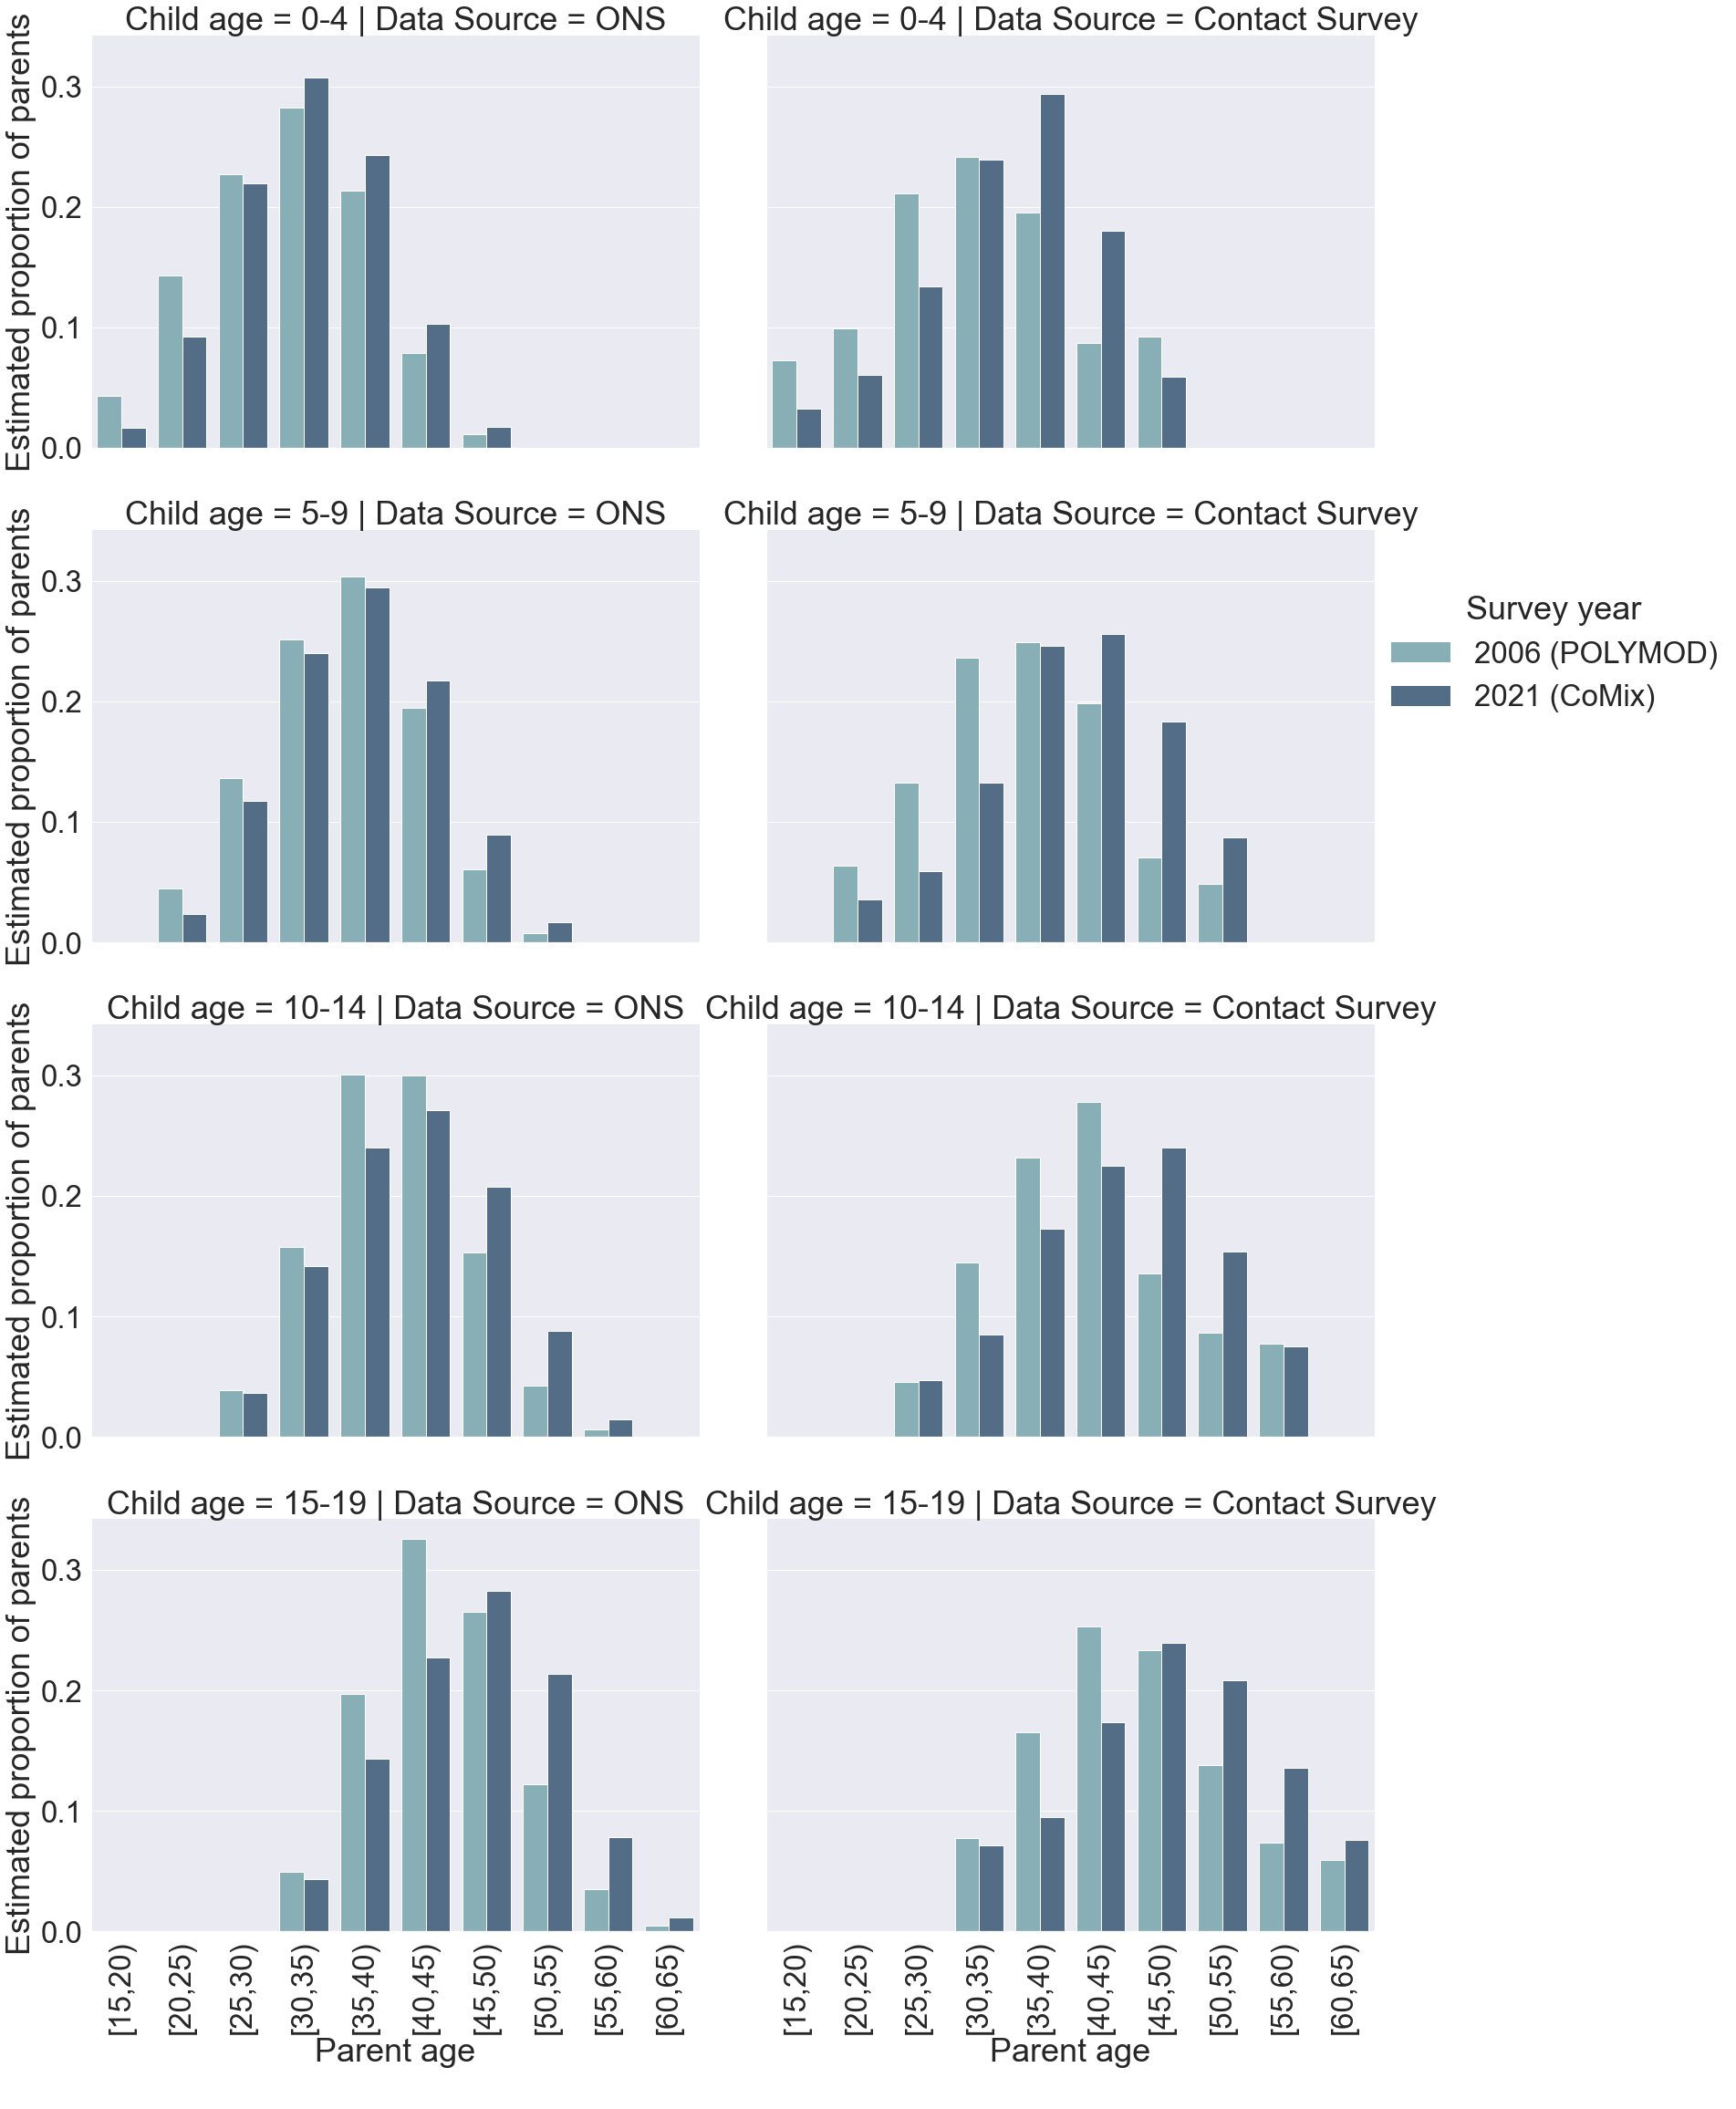

In [5]:
# Generate bar plots for both ONS and CoMix/POLYMOD estimates of parental age (Figure S2)

x = []
y = []
z = []
i = []

age_labels = {
    '0-4': ['[15,20)','[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)'],
    '5-9': ['[20,25)', '[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)'],
    '10-14': ['[25,30)', '[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)'],
    '15-19': ['[30,35)', '[35,40)', '[40,45)', '[45,50)', '[50,55)', '[55,60)', '[60,65)']
}

for target_group in age_labels:
    x = x + age_labels[target_group] * 4
    
    y = y + polymod_parents_binned_norm[target_group]
    y = y + comix_parents_binned_norm[target_group]
    y = y + polymod_prop_measured[target_group]
    y = y + comix_prop_measured[target_group]
    
    z = z + [target_group] * 28

    

data_dic = {'Parent age\n': x, 
            'Child age': z,
            'Data Source': 4 * (['ONS'] * 14 + ['Contact Survey'] * 14), #1 * (['ONS'] * 16 + ['Contact Survey'] * 16),
            'Survey year': 8 * (['2006 (POLYMOD)'] * 7 + ['2021 (CoMix)'] * 7), #2 * (['2006 (POLYMOD)'] * 8 + ['2021 (CoMix)'] * 8), 
            'Estimated proportion of parents': y,
           }

data = pd.DataFrame(data_dic)


pal = sb.cubehelix_palette(2, rot=-.25, light=0.65, dark = 0.4)

sb.set(font_scale=3)

cat_plot = sb.catplot(
    data=data, kind="bar",
    x="Parent age\n", y="Estimated proportion of parents", col="Data Source", hue="Survey year", row="Child age",
    height=8, aspect=1.4, palette=pal,
).set_xticklabels(rotation=90)

sb.move_legend(cat_plot, "center right", bbox_to_anchor=(1, 0.675))

fig = cat_plot.fig


# fig.savefig("full_ONS_surveys.pdf") 